## Simple linear regresssion with python

### Python packages for regression
python packages ที่สามารถนำมาใช้วิเคราะห์ regression มีหลาย package เช่น:
1. [statsmodels](http://statsmodels.sourceforge.net/)
+ [scikit-learn](http://scikit-learn.org/)
+ [SciPy](http://www.scipy.org/)
+ ... 

### Example dataset
ไฟล์ข้อมูลที่จะนำมาใช้วิเคราะห์คือ 'Advertising' สามารถ download จาก
http://www-bcf.usc.edu/~gareth/ISL/data.html)

ข้อมูลมีทั้งหมด 200 ตัวอย่าง แต่ละตัวอย่างประกอบด้วยงบประมาณโฆษณาทางโทรทัศน์ วิทยุ และหนังสือพิมพ์ และมูลค่ายอดขายสินค้า
ต้องการหาความสัมพันธ์ระหว่างงบประมาณค่าโฆษณาทางโทรทัศน์ วิทยุ หนังสือพิมพ์ (ตัวแปรอิสระ)กับมูลค่ายอดขายสินค้า(ตัวแปรตาม)
ซึ่งจะนำไปช่วยในการวางแผนงบประมาณการโฆษณาผ่านทางช่องทางใดที่จะทำให้มูลค่ายอดขายสินค้ามากที่สุด

In [3]:
import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline  
#plt.rcParams['figure.figsize'] = (10, 6) #ปรับกราฟให้มีขนาด 10x6


In [2]:
# อ่านข้อมูลจากไฟล์ excel Advertising.csv
advert = pd.read_csv('Advertising.csv')
advert.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Plot and describe the data

In [4]:
# หาความสัมพันธ์ของข้อมูล
print(advert.corr())

            Unnamed: 0        TV     radio  newspaper     sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
radio        -0.110680  0.054809  1.000000   0.354104  0.576223
newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
sales        -0.051616  0.782224  0.576223   0.228299  1.000000


In [5]:
advert.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

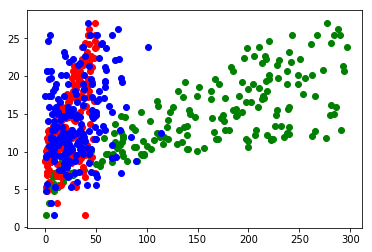

In [6]:
# สร้าง scatter plot เพื่อดูความสัมพันธ์ของข้อมูลทั้ง 4
# 'TV', 'radio', 'newspaper', 'sales'

# 'TV', 'radio', 'newspaper'
plt.scatter(advert['TV'], advert['sales'], color='green')
plt.scatter(advert['radio'], advert['sales'], color='red')
plt.scatter(advert['newspaper'], advert['sales'], color='blue')

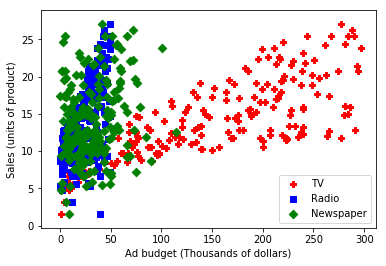

In [7]:
#ใช้คำสั่ง scatter plot เพื่อดูความสัมพันธ์ทั้ง 4 ตัวแปร
# 'TV', 'radio', 'newspaper', 'sales'   maker[P,s,D]

# plt.scatter(x=advert['col'],y=advert['sales'],c='r',marker='P',label='label_col')
plt.scatter(x=advert['TV'],y=advert['sales'],c='r',marker='P',label='TV')
plt.scatter(x=advert['radio'],y=advert['sales'],c='b',marker='s',label='Radio')
plt.scatter(x=advert['newspaper'],y=advert['sales'],c='g',marker='D',label='Newspaper')


#plt.legend(numpoints=1,loc=4)
plt.legend(loc=4)
plt.xlabel('Ad budget (Thousands of dollars)')
plt.ylabel('Sales (units of product)')
plt.show()

In [8]:
advert.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## Observations 
1. จากกราฟที่ได้ จะเห็นว่าจำนวนยอดขายมีความสัมพันธ์กับงบประมาณที่จ่ายในการโฆษณา นั่่นคือเมื่อมีการโฆษณาสินค้ามาก มูลค่ายอดขายสินค้าเพิ่มมากขึ้น 
+  มีการใช้งบประมาณมากที่สุดสำหรับการโฆษณาทางทีวี งบประมาณโฆษณาสำหรับวิทยุและหนังสือพิมพ์ทำให้มูลค่ายอดขายไม่แตกต่างกันมาก ส่วนเบี่ยงเบนมาตรฐานของตัวแปรค่าโฆษณาทางโทรทัศน์มีค่ามากกว่าตัวแปรอื่นๆ  

## Questions
1. ความสัมพันธ์ระหว่างการโฆษณาและการขายสามารถวิเคราะห์ได้อย่างไร? สามารถคาดการณ์ผลกระทบของแต่ละสื่อโฆษณาที่มีผลต่อมูลค่ายอดขายได้หรือไม่? ความสัมพันธ์เป็นเส้นตรงหรือไม่
+  สื่อโฆษณาใด (TV, Radio, Newspaper) ที่ทำให้มูลค่ายอดขายมากที่สุด
+  ตัวแปรแต่ละตัวมีความสัมพันธ์กันหรือไม่

ดังนั้นเริ่มแรก มาพิจารณาตัวแปรสื่อโฆษณาทางโทรทัศน์มีผลต่อมูลค่ายอดขายสินค้าโดยใช้ linear regression model 

$$
Sales = \beta_0 + \beta_1 * TV.
$$

In [9]:
#Ordinary Least Squares: OLS เป็นการประมาณค่าด้วยวิธีกําลังสองน้อยที่สุดทําให้ผลรวมกําลังสองของค่า error น้อยที่สุด
# sales  TV
ad_TV_ols = sm.ols(formula="sales ~ TV", data=advert) 
TV_fit_model = ad_TV_ols.fit() # ปรับ model regression เพื่อให้ค่า error น้อยที่สุด
TV_fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           1.47e-42
Time:                        15:06:03   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

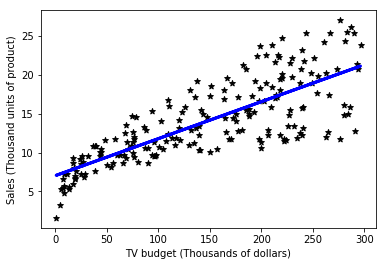

In [10]:
# ใช้ scatter plot เพื่อดูความสัมพันธ์ของตัวแปรสื่อโฆษณาทางโทรทัศน์กับมูลค่ายอดขายสินค้า และแสดงเส้นพยากรณ์ของความสัมพันธ์ของ 2 ตัวแปร
plt.scatter(x=advert['TV'],y=advert['sales'],c='k',marker='*',label='TV')
plt.plot(advert['TV'],TV_fit_model.predict(),'k',color='blue',linewidth=3)

plt.xlabel('TV budget (Thousands of dollars)')
plt.ylabel('Sales (Thousand units of product)')
plt.show()

## ตัวอย่างของการหา   simple linear regression model โดยใช้ scikit-learn

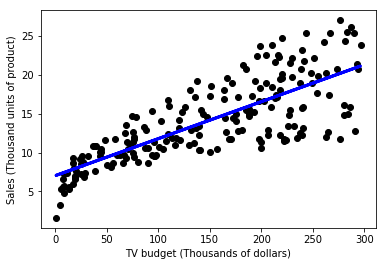

In [11]:
lr = linear_model.LinearRegression() # create a linear regression object

# scikit-learn doesn't work as well with pandas, so we have to extract values 
x = advert['TV'].values.reshape(advert['TV'].shape[0],1)
y = advert['sales'].values.reshape(advert['sales'].shape[0],1)

lr.fit(X=x, y=y)

plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)

plt.xlabel('TV budget (Thousands of dollars)')
plt.ylabel('Sales (Thousand units of product)')
plt.show()

## Interpretation and discussion การแปลผลและการวิเคราะห์

จุดตัดของเส้นตรงพยากรณ์ของตัวแปรมูลค่ายอดขาย (ตัวแปรตาม)คือ $\hat{\beta}_0 = 7.032$ นั้นหมายถึงว่าถึงแม้ไม่มีการโฆษณาทางโทรทัศน์ เส้นพยากรณ์ประมาณมูลค่ายอดขายสินค้าได้ 7,032 หน่วย

ความชันของเส้นตรงพยากรณ์ของตัวแปรมูลค่ายอดขาย (ตัวแปรตาม)คือ $\hat{\beta}_1 = 0.0475$. นั้นหมายถึงเส้นพยากรณ์ประมาณมูลค่ายอดขายสินค้าเพิ่มขึ้น 47.5 หน่วย เมื่อมีการจ่ายค่าโฆษณาทางโทรทัศน์ทุกๆ 1,000 หน่วย 

ก่อนจะใช้ linear regresssion ในการพยากรณ์และประมาณมูลค่ายอดขายต้องมีการประเมินสมการ linear regression ที่ได้จากตัวอย่างก่อน โดยประเมินว่าสมการที่ได้นั้นสามารถอธิบายความสัมพันธ์ระหว่างตัวแปร 2 ตัวแปรได้ดีเพียงใดโดยพิจารณาจากผลบวกกำลังสองของ linear regression หรือเรียกว่าสัมประสิทธิ์การกําหนด แทนด้วย **$R^2$** ซึ่งมีค่าอยู่ระหว่าง 0 ถึง 1

จาก model ที่ให้ผลการคำนวณออกมา ได้ค่า $R^2 = 0.612$ ที่แสดงถึงความสัมพันธ์ของค่าใช้จ่ายโฆษณาทางโทรทัศน์กับมูลค่ายอดขายสินค้าที่ 61.2%

##  การทดสอบสมมติฐานใน linear regression

เพื่อทดสอบสมการถดถอยว่าสามารถอธิบายความสัมพันธ์ระหว่างตัวแปร 2 ตัวได้ดีเพียงใด และสามารถใช้สมการถดถอยในการทํานาย และประมาณค่า Y ได้อย่างมีประสิทธิภาพหรือไม่ สมมติฐานที่ใช้ทดสอบคือ 

$$
H_0: \text{ไม่มีความสัมพัธ์ระหว่างตัวแปร $x$ and $y$} \iff \beta_1 = 0 
$$
กับ
$$
H_a: \text{มีความสัมพันธ์ระหว่างตัวแปร $x$ and $y$}  \iff \beta_1 \neq 0 
$$

## ต้องการวิเคราะห์ว่าตัวแปรอื่นๆ มีผลต่อมูลค่ายอดขายสินค้าหรือไม่
ใช้ linear regression วิเคราะห์ค่าใช้จ่ายในการโฆษณาทางวิทยุและหนังสือพิมพ์มีผลต่อมูลค่ายอดขายสินค้าหรือไม่ โดยใช้ statsmodels

In [12]:
#Ordinary Least Squares (OLS) แนวคิดกำลังสองน้อยที่สุด
# sales , radio
# sm.ols(formula="", data=advert).fit()
ad_Radio_ols = sm.ols(formula="sales ~ radio ", data=advert).fit()
ad_Radio_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           4.35e-19
Time:                        15:13:18   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# sales , newspaper
# sm.ols(formula="", data=advert).fit()
ad_Newspaper_ols =  sm.ols(formula="sales ~ newspaper ", data=advert).fit()
ad_Newspaper_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 28 Sep 2023   Prob (F-statistic):            0.00115
Time:                        15:13:21   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

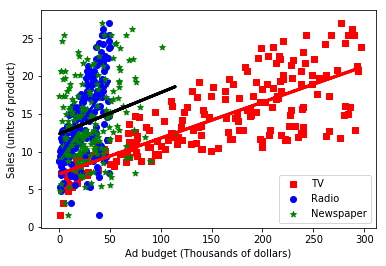

In [14]:
#ใช้ scatter plot เพื่อดูความสัมพันธ์ของตัวแปรสื่อโฆษณาทางโทรทัศน์, วิทยุ และหนังสือพิมพ์กับมูลค่ายอดขายสินค้าและแสดงเส้นพยากรณ์ของความสัมพันธ์ของ 4 ตัวแปร
plt.scatter(x=advert['TV'],y=advert['sales'],c='r',marker='s',label='TV')
plt.scatter(x=advert['radio'],y=advert['sales'],c='b',marker='o',label='Radio')
plt.scatter(x=advert['newspaper'],y=advert['sales'],c='g',marker='*',label='Newspaper')
plt.legend(numpoints=1,loc=4)

plt.plot(advert['TV'],TV_fit_model.predict(),c='r',linewidth=3)
plt.plot(advert['radio'],ad_Radio_ols.predict(),c='b',linewidth=3)
plt.plot(advert['newspaper'],ad_Newspaper_ols.predict(),c='k',linewidth=3)

plt.xlabel('Ad budget (Thousands of dollars)')
plt.ylabel('Sales (units of product)')
plt.show()


## การแปลผล

จากกราฟและผลการคำนวณโดย statsmodel จะเห็นว่าค่าความชันของเส้นพยากรณ์ระหว่างตัวแปรค่าใช้จ่ายทางวิทยุมีค่ามากกว่าค่าใช้จ่ายทางหนังสือพิมพ์และทางโทรทัศน์

ค่า $R^2$ ของความสัมพันธ์ของตัวแปรค่าใช้จ่ายการโฆษณาทางวิทยุกับมูลค่าของยอดขายคือ 33.2% เมื่อเปรียบเทียบกับค่า $R^2$ ของความสัมพันธ์ของตัวแปรค่าใช้จ่ายการโฆษณาทางโทรทัศน์กับมูลค่าของยอดขายคือ 61.2% และเมื่อเปรียบเทียบกับค่า $R^2$ ของความสัมพันธ์ของตัวแปรค่าใช้จ่ายการโฆษณาทางหนังสือพิมพ์กับมูลค่าของยอดขายคือ 5.2%

ดังนั้นพิจารณาตัวแปรค่าใช้จ่ายโฆษณาทางโทรทัศน์ วิทยุ หนังสือพิมพ์ที่มีผลต่อมูลค่ายอดขายพร้อมกัน Multiple Linear Regression  ที่ได้จะได้สมการดังนี้ 
 
$$
Sales = \beta_0 + \beta_1 * TV + \beta_2*Radio + \beta_3*Newspaper. 
$$

## Multiple Linear Regression

**Model:**
$$
Sales = \beta_0 + \beta_1 * TV + \beta_2*Radio + \beta_3*Newspaper. 
$$


In [15]:
# sales , TV + radio + newspaper
ad_all_ols = sm.ols(formula="sales ~ TV + radio + newspaper", data=advert).fit()
#ad_all_ols = sm.ols(formula="sales ~ TV + newspaper", data=advert).fit()
ad_all_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           1.58e-96
Time:                        15:15:10   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# plot ดูค่าสัมประสิทธิ์สหสัมพันธ์ (r) ของตัวแปรมูลค่ายอดขายกับตัวแปรค่าโฆษณาทางโทรทัศน์ วิทยุ หนังสือพิมพ์ (use corr())
print(advert.corr())
#pd.plotting.scatter_matrix(advert, figsize=(10, 10), diagonal='kde')
pd.plotting.scatter_matrix(advert, figsize=(10, 10), diagonal='hist')
plt.show()


สัมประสิทธิ์สหสัมพันธ์ (r) ระหว่างค่าโฆษณาทางหนังสือพิมพ์และวิทยุคือ 0.35 แต่อย่างไรก็ตามเมื่อพิจารณาค่า t=-0.177 (ค่า t เป็นสถิติที่ใช้ทดสอบว่าตัวแปรอิสระใดบ้างที่สามารถใช้พยากรณ์ตัวแปรตามได้บ้าง) และ p-value=0.860 มีค่ามากกว่าค่า alpha = 0.05 ยอมรับ H0 แสดงว่าตัวแปรค่าโฆษณาทางหนังสือพิมพ์ไม่มีความสัมพันธ์กับมูลค่ายอดขายสินค้า ดังนั้นสมการ regression สุดท้ายที่ได้คือ

$$
\text{Sales} = \beta_0 + \beta_1 * \text{TV_budget} + \beta_2*\text{Radio_budget} 
$$


In [16]:
# sales , TV + radio
# sm.ols(formula="", data=advert).fit()
ad_TR_ols = sm.ols(formula="sales ~ TV + radio", data=advert).fit()
ad_TR_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           4.83e-98
Time:                        15:16:35   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

สมการ regression สามารถพยากรณ์มูลค่ายอดขายสินค้าที่ขึ้นอยู่กับตัวแปรค่าโฆษณาทางโทรทัศน์และวิทยุ โดยที่ค่า  $R^2 = ??.?\%$ 